# Transfer Learning

* 🤯 Tech companies and university labs have more computational resources than we do
* 😎 Let them train their  super complex models on millions of images, and could re-use their kernels for our own CNNs !

**Goal**<br/>
☄️ Use a **`Pretrained Neural Network`**, let's do some **`Transfer learning`**

## What is a Pre-Trained Neural Network ?

* Convolutions are mathematical operations designed to detect specific patterns in input images and use them to classify the images. 
* One could imagine that these patterns are not 100% specific to one task but to the input images. 

💡 Therefore, **why not `re-using these kernels - whose weights have already been optimized - somewhere else`  ?** 
with the expectation that these trained kernels could also help us perform another classification task ?

👀 What we are talking about here is the **`transfer`** of a CNN knowledge to a new classification task.

🔥 $\rightarrow$ **`Transfer Learning`** has two  main advantages:
- It takes less time to train a pre-trained model since we are not going to update all the weights but only the some of them
- You benefit from state-of-the-art architectures that have been trained on complex images. 

### Introduction to  VGG16
In this exercise, we will use the <a href="https://neurohive.io/en/popular-networks/vgg16/">**`VGG-16 Neural Network`**</a>.

> VGG16 is a convolutional neural network model proposed by K. Simonyan and A. Zisserman from the University of Oxford in the paper “Very Deep Convolutional Networks for Large-Scale Image Recognition”. The model achieves 92.7% top-5 test accuracy in ImageNet, which is a dataset of over 14 million images belonging to 1000 classes. It was one of the famous model submitted to ILSVRC-2014. It makes the improvement over AlexNet by replacing large kernel-sized filters (11 and 5 in the first and second convolutional layer, respectively) with multiple 3×3 kernel-sized filters one after another. VGG16 was trained for weeks and was using NVIDIA Titan Black GPU’s.

VGG16 is a well-known architecture that has been trained on the <a href="https://www.image-net.org/">**`ImageNet dataset`**</a> which is a very large database of images which belong to different categories. 

👉 This architecture already learnt what kernels are supposed to be the best for extracting features from the images found in the `ImageNet dataset`.

👉 As you can see in the illustration, the VGG16 involves millions of parameters you don't want to retrain yourself.


<center><img src="https://neurohive.io/wp-content/uploads/2018/11/vgg16-1-e1542731207177.png" width=400></center>

❓ How does it work in practice ❓

* The first layers are not specialized for the particular task the VGG16 CNN was trained on
* Only the last dense layers are "classification layers"... Therefore, we will: 
    1. Load the existing VGG16 network
    2. Remove the last fully connected layers
    3. Replace them by some new fully-connected layers (whose weights are randomly set)
    4. Train these last layers on a specific classification task. 

😃 Your role is to train  only learn the last layers for your particular problem.

🤓 We'll use <a href="https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/VGG16">**`tensorflow.keras.applications.VGG16`**</a>

<hr>

## Data loading & Preprocessing

You have two options to load the data on Google Colab.


### `Option 1: Loading the data directly`

* You can first get the data onto google Colab thanks to:

`!wget https://wagon-public-datasets.s3.amazonaws.com/flowers-dataset.zip`,

* and then run 

`!unzip flowers-dataset.zip`

*This is a very easy option to load the data into your working directory.*

### `Option 2: Adding the data to Google Drive.`

* You can first download the data  from `https://wagon-public-datasets.s3.amazonaws.com/flowers-dataset.zip`. 
* Then you have to add them to your Google Drive in a folder called `Deep_learning_data` (for instance)
* And run the following code in the notebook: 

```python
from google.colab import drive
drive.mount('/content/drive/')
```

* The previous code will ask you to go to a given webpage where you can copy a temporary key
* Paste it in the cell that will appear in your Colab Notebook
* You can now load the data on your Google Colab Notebooks

### Option 1 or Option 2 ?

* Why choosing option 2 over the option 1? 
    * ✅ The combo Colab + Drive can be interesting if you work within a project team, and need to update the data from time to time. 
    * ✅ By doing this, you can share the same data folder with your teammates, and be sure that everyone has the same dataset at any time, even though someone changes it. 
    * ❌ Google Colab has now access to your Google Folder..., which you might not be or not in favor of, depending on your sensibility...


❓ **Question** ❓ Use one of the above method to load your data

In [0]:
option_1 = True # Choose here

if option_1:
    !wget https://wagon-public-datasets.s3.amazonaws.com/flowers-dataset.zip
    !unzip flowers-dataset.zip
else:
    from google.colab import drive
    drive.mount('/content/drive/')

--2021-08-11 15:14:16--  https://wagon-public-datasets.s3.amazonaws.com/flowers-dataset.zip
Resolving wagon-public-datasets.s3.amazonaws.com (wagon-public-datasets.s3.amazonaws.com)... 52.218.117.49
Connecting to wagon-public-datasets.s3.amazonaws.com (wagon-public-datasets.s3.amazonaws.com)|52.218.117.49|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104983809 (100M) [application/zip]
Saving to: ‘flowers-dataset.zip’

flowers-dataset.zip 100%[===================>] 100.12M  2.20MB/s    in 45s     

2021-08-11 15:15:02 (2.22 MB/s) - ‘flowers-dataset.zip’ saved [104983809/104983809]

Archive:  flowers-dataset.zip
  inflating: flowers/daisy/2607132536_d95198e619_n.jpg  
  inflating: flowers/daisy/6480809771_b1e14c5cc2_m.jpg  
  inflating: flowers/daisy/9350942387_5b1d043c26_n.jpg  
  inflating: flowers/daisy/4065883015_4bb6010cb7_n.jpg  
  inflating: flowers/daisy/7924174040_444d5bbb8a.jpg  
  inflating: flowers/daisy/8740807508_0587f5b7b7.jpg  
  inflating: flo

  inflating: flowers/dandelion/34719957845_c929f480a3_n.jpg  
  inflating: flowers/dandelion/8929523512_c87897b84e.jpg  
  inflating: flowers/dandelion/2502627784_4486978bcf.jpg  
  inflating: flowers/rose/3705716290_cb7d803130_n.jpg  
  inflating: flowers/daisy/6596277835_9f86da54bb.jpg  
  inflating: flowers/daisy/20580471306_ab5a011b15_n.jpg  
  inflating: flowers/daisy/33806101464_5eca772954_n.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/4413849849_b8d2f3bcf1_n.jpg  
  inflating: flowers/dandelion/6901435398_b3192ff7f8_m.jpg  
  inflating: flowers/dandelion/34334194690_0dfe3d8701_n.jpg  
  inflating: flowers/daisy/5981645737_29eceac291_m.jpg  
  inflating: flowers/dandelion/7226987694_34552c3115_n.jpg  
  inflating: flowers/dandelion/18204150090_fb418bbddb.jpg  
  inflating: flowers/daisy/5884807222_22f5326ba8_m.jpg  
  inflating: flowers/daisy/8322526877_95d1c0f8bc_n.jpg  
  inflating: flowers/daisy/34518374242_310e7abd54_n.jpg  
  inf

  inflating: flowers/dandelion/13967344688_aa629dcdee_n.jpg  
  inflating: flowers/dandelion/4944731313_023a0508fd_n.jpg  
  inflating: flowers/dandelion/33881120324_552f677c1a_n.jpg  
  inflating: flowers/dandelion/33859759654_be0be6f876_n.jpg  
  inflating: flowers/rose/3253243865_435c1f2c2b_m.jpg  
  inflating: flowers/dandelion/34335240590_41e4a393db_n.jpg  
  inflating: flowers/dandelion/8684925862_d736e153bf_n.jpg  
  inflating: flowers/dandelion/19691175559_ef12b8b354_n.jpg  
  inflating: flowers/rose/5073473370_bdbb5a99fc.jpg  
  inflating: flowers/daisy/34476770012_38fba290f3_n.jpg  
  inflating: flowers/daisy/17027891179_3edc08f4f6.jpg  
  inflating: flowers/dandelion/146242691_44d9c9d6ce_n.jpg  
  inflating: flowers/dandelion/34692530906_fe2470a5e5_n.jpg  
  inflating: flowers/rose/4588034197_e300b0872a_n.jpg  
  inflating: flowers/daisy/9221345475_67735dbf4f_n.jpg  
  inflating: flowers/dandelion/8701999625_8d83138124.jpg  
  inflating: flowers/dandelion/13560152823_9da5e48

  inflating: flowers/daisy/18354545086_693ea7bc2a.jpg  
  inflating: flowers/dandelion/14128835667_b6a916222c.jpg  
  inflating: flowers/daisy/4727955343_0bb23ac4ae.jpg  
  inflating: flowers/daisy/19813618946_93818db7aa_m.jpg  
  inflating: flowers/rose/3655527028_0fab2b547d_n.jpg  
  inflating: flowers/dandelion/2995221296_a6ddaccc39.jpg  
  inflating: flowers/daisy/721595842_bacd80a6ac.jpg  
  inflating: flowers/daisy/15853110333_229c439e7f.jpg  
  inflating: flowers/daisy/16577886423_9b23622f1d_n.jpg  
  inflating: flowers/daisy/5773652803_574b51414f_n.jpg  
  inflating: flowers/rose/5001852101_877cb2ae9b_n.jpg  
  inflating: flowers/daisy/34076975155_1faeedec90_n.jpg  
  inflating: flowers/dandelion/17457028309_95514c8d02_n.jpg  
  inflating: flowers/daisy/521762040_f26f2e08dd.jpg  
  inflating: flowers/daisy/2635314490_e12d3b0f36_m.jpg  
  inflating: flowers/rose/5002462640_5bf92142bf_n.jpg  
  inflating: flowers/dandelion/3357432116_b3dce6fed3_n.jpg  
  inflating: flowers/dandel

  inflating: flowers/dandelion/6250363717_17732e992e_n.jpg  
  inflating: flowers/daisy/5809489674_5659b3ae5d_n.jpg  
  inflating: flowers/daisy/2087343668_ef4fb95787_n.jpg  
  inflating: flowers/daisy/4534460263_8e9611db3c_n.jpg  
  inflating: flowers/daisy/4669117051_ce61e91b76.jpg  
  inflating: flowers/rose/3074406590_91c697c805_n.jpg  
  inflating: flowers/daisy/5973491805_556bba93cc.jpg  
  inflating: flowers/daisy/10555826524_423eb8bf71_n.jpg  
  inflating: flowers/rose/2501297526_cbd66a3f7e_m.jpg  
  inflating: flowers/dandelion/4574737576_044403a997_n.jpg  
  inflating: flowers/daisy/9242705328_eee8402a8d.jpg  
  inflating: flowers/rose/5001846725_7bb1b9fedf_n.jpg  
  inflating: flowers/rose/3072908271_08764c732a_m.jpg  
  inflating: flowers/rose/1788484468_f73afa6c32_n.jpg  
  inflating: flowers/daisy/8710109684_e2c5ef6aeb_n.jpg  
  inflating: flowers/daisy/5673551_01d1ea993e_n.jpg  
  inflating: flowers/daisy/16527403771_2391f137c4_n.jpg  
  inflating: flowers/dandelion/1386

  inflating: flowers/dandelion/3365850019_8158a161a8_n.jpg  
  inflating: flowers/dandelion/8533312924_ee09412645_n.jpg  
  inflating: flowers/rose/3264570182_c7ded528ba_m.jpg  
  inflating: flowers/daisy/6950173662_5e9473003e_n.jpg  
  inflating: flowers/dandelion/33892172244_684e99b6fc_n.jpg  
  inflating: flowers/rose/1801614110_bb9fa46830.jpg  
  inflating: flowers/daisy/33923454163_9cabcaa733_n.jpg  
  inflating: flowers/daisy/4923279674_e7f8e70794_n.jpg  
  inflating: flowers/daisy/2349640101_212c275aa7.jpg  
  inflating: flowers/dandelion/8681420404_6ae114f036_n.jpg  
  inflating: flowers/dandelion/14805304536_c321a7b061_n.jpg  
  inflating: flowers/dandelion/2467980325_237b14c737_m.jpg  
  inflating: flowers/dandelion/9517326597_5d116a0166.jpg  
  inflating: flowers/dandelion/6132275522_ce46b33c33_m.jpg  
  inflating: flowers/dandelion/33877749474_1fb8111daf_n.jpg  
  inflating: flowers/dandelion/2494436687_775402e0aa.jpg  
  inflating: flowers/daisy/3750250718_eb61146c5f.jpg  

  inflating: flowers/dandelion/34699848885_a832ee03ab_n.jpg  
  inflating: flowers/daisy/34729724865_787c98299d_n.jpg  
  inflating: flowers/dandelion/138166590_47c6cb9dd0.jpg  
  inflating: flowers/dandelion/510874382_f7e3435043.jpg  
  inflating: flowers/dandelion/8754822932_948afc7cef.jpg  
  inflating: flowers/daisy/2365428551_39f83f10bf_n.jpg  
  inflating: flowers/dandelion/34717754295_cbb0185a36_n.jpg  
  inflating: flowers/dandelion/4893356345_24d67eff9f_m.jpg  
  inflating: flowers/daisy/34720703615_bdf1335d8b_n.jpg  
  inflating: flowers/dandelion/2481428401_bed64dd043.jpg  
  inflating: flowers/dandelion/5725836812_a7d1c5540d_m.jpg  
  inflating: flowers/dandelion/15002906952_cab2cb29cf.jpg  
  inflating: flowers/rose/509239741_28e2cfe492_m.jpg  
  inflating: flowers/dandelion/3998275481_651205e02d.jpg  
  inflating: flowers/dandelion/34323484476_6406ee1e37_n.jpg  
  inflating: flowers/dandelion/3612582808_4503fa1f8b_m.jpg  
  inflating: flowers/dandelion/5110104894_a52c6855

  inflating: flowers/dandelion/8980145452_efbd6e3b04.jpg  
  inflating: flowers/daisy/19178753159_a471bf4b6b.jpg  
  inflating: flowers/dandelion/8687729737_a7fbeded2c_m.jpg  
  inflating: flowers/dandelion/5109496141_8dcf673d43_n.jpg  
  inflating: flowers/rose/5001855107_71351ce785_n.jpg  
  inflating: flowers/dandelion/29687446176_096b86f44c_n.jpg  
  inflating: flowers/dandelion/151861297_55b10a03a6_n.jpg  
  inflating: flowers/dandelion/1195255751_d58b3d3076.jpg  
  inflating: flowers/dandelion/14886963928_d4856f1eb6_n.jpg  
  inflating: flowers/daisy/3483303007_42e3f90da7.jpg  
  inflating: flowers/dandelion/1443259657_2704fab26e_n.jpg  
  inflating: flowers/dandelion/17095758258_a33642946f_n.jpg  
  inflating: flowers/daisy/9593034725_0062f0d24e_n.jpg  
  inflating: flowers/daisy/2479956481_8d1a9699be_n.jpg  
  inflating: flowers/dandelion/14185089716_2a48298d17.jpg  
  inflating: flowers/daisy/19527362416_8bdcbefb8b_n.jpg  
  inflating: flowers/dandelion/8724252904_db9a5104df_m

  inflating: flowers/rose/2609353769_dc3654f12f.jpg  
  inflating: flowers/daisy/15306268004_4680ba95e1.jpg  
  inflating: flowers/dandelion/19599413676_fc9ee2640e.jpg  
  inflating: flowers/daisy/2646438199_b309cffd65_n.jpg  
  inflating: flowers/rose/2258973326_03c0145f15_n.jpg  
  inflating: flowers/daisy/2632216904_274aa17433.jpg  
  inflating: flowers/dandelion/8956863946_f96be02aae_n.jpg  
  inflating: flowers/daisy/5769217520_c90efc3c93_m.jpg  
  inflating: flowers/daisy/3080880039_4f1bd592e5_n.jpg  
  inflating: flowers/daisy/7790614422_4557928ab9_n.jpg  
  inflating: flowers/daisy/5110109540_beed4ed162_m.jpg  
  inflating: flowers/rose/4684127262_6c3346188d.jpg  
  inflating: flowers/rose/534228982_4afbcece9b_m.jpg  
  inflating: flowers/daisy/13583238844_573df2de8e_m.jpg  
  inflating: flowers/dandelion/2521811279_1f7fc353bf_n.jpg  
  inflating: flowers/daisy/3440366251_5b9bdf27c9_m.jpg  
  inflating: flowers/daisy/3640845041_80a92c4205_n.jpg  
  inflating: flowers/dandelion/

  inflating: flowers/daisy/2511306240_9047015f2d_n.jpg  
  inflating: flowers/daisy/488202750_c420cbce61.jpg  
  inflating: flowers/dandelion/1241011700_261ae180ca.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/dandelion/14053173516_a00150a919_m.jpg  
  inflating: flowers/daisy/2812442552_3eed5fb9f2_m.jpg  
  inflating: flowers/dandelion/5607669502_ccd2a76668_n.jpg  
  inflating: flowers/rose/3526860692_4c551191b1_m.jpg  
  inflating: flowers/daisy/4657354814_f368762c53_m.jpg  
  inflating: flowers/daisy/14613443462_d4ed356201.jpg  
  inflating: flowers/daisy/29380234244_c50a60374e_n.jpg  
  inflating: flowers/dandelion/13386618495_3df1f1330d.jpg  
  inflating: flowers/daisy/5944315415_2be8abeb2f_m.jpg  
  inflating: flowers/dandelion/142390525_5d81a3659d_m.jpg  
  inflating: flowers/dandelion/33856267954_b806fab0db_n.jpg  
  inflating: flowers/dandelion/6983113346_21551e1b52_n.jpg  
  inflating: flowers/daisy/2045022175_ad087f5f60_n.jpg  
  inflatin

  inflating: flowers/dandelion/5863928177_8ae1425e76_n.jpg  
  inflating: flowers/dandelion/4500964841_b1142b50fb_n.jpg  
  inflating: flowers/dandelion/34560984002_254f326f12_n.jpg  
  inflating: flowers/rose/4654893119_45d232016b.jpg  
  inflating: flowers/daisy/34611565966_9de274f987_n.jpg  
  inflating: flowers/daisy/5796562389_ae43c83317_m.jpg  
  inflating: flowers/dandelion/3496258301_ca5f168306.jpg  
  inflating: flowers/dandelion/18479635994_83f93f4120.jpg  
  inflating: flowers/dandelion/4847150510_7a5db086fa.jpg  
  inflating: flowers/dandelion/8733226215_161309f8ec.jpg  
  inflating: flowers/dandelion/5715788902_9dd2b4ef1d.jpg  
  inflating: flowers/dandelion/3580443099_9a6902ebd8_n.jpg  
  inflating: flowers/daisy/3962240986_0661edc43a_n.jpg  
  inflating: flowers/dandelion/5762590366_5cf7a32b87_n.jpg  
  inflating: flowers/dandelion/8978962053_0727b41d26.jpg  
  inflating: flowers/rose/410425647_4586667858.jpg  
  inflating: flowers/dandelion/141652526_2be95f21c3_n.jpg  


  inflating: flowers/daisy/301964511_fab84ea1c1.jpg  
  inflating: flowers/dandelion/13331969914_890082d898_n.jpg  
  inflating: flowers/daisy/11023214096_b5b39fab08.jpg  
  inflating: flowers/dandelion/3383422012_6c9d83671f_n.jpg  
  inflating: flowers/dandelion/98992760_53ed1d26a9.jpg  
  inflating: flowers/dandelion/11124381625_24b17662bd_n.jpg  
  inflating: flowers/daisy/162362896_99c7d851c8_n.jpg  
  inflating: flowers/dandelion/4523862714_b41b459c88.jpg  
  inflating: flowers/rose/2788276815_8f730bd942.jpg  
  inflating: flowers/rose/174109630_3c544b8a2f.jpg  
  inflating: flowers/dandelion/8842317179_d59cf218cb_n.jpg  
  inflating: flowers/daisy/15327813273_06cdf42210.jpg  
  inflating: flowers/daisy/813445367_187ecf080a_n.jpg  
  inflating: flowers/dandelion/9200211647_be34ce978b.jpg  
  inflating: flowers/daisy/4814515275_6e25a6c18f.jpg  
  inflating: flowers/daisy/171972704_389cf7a953.jpg  
  inflating: flowers/dandelion/4226758402_a1b75ce3ac_n.jpg  
  inflating: flowers/dan

In [0]:
!pwd

/Users/davywai/code/davydw/data-solutions/06-Deep-Learning/03-Convolutional-Neural-Networks/04-Transfer-Learning


In [0]:
!ls

README.md               flowers-dataset.zip
flowers                 transfer_learning.ipynb


❓ **Question** ❓ Use the following method to create 
`X_train, y_train, X_val, y_val, X_test, y_test, num_classes` depending on the `loading_method` you have used

In [0]:
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm
import numpy as np
import os
from PIL import Image

def load_flowers_data(loading_method):
    if loading_method == 'colab':
        data_path = '/content/drive/My Drive/Deep_learning_data/flowers'
    elif loading_method == 'direct':
        data_path = 'flowers/'
    classes = {'daisy':0, 'dandelion':1, 'rose':2}
    imgs = []
    labels = []
    for (cl, i) in classes.items():
        images_path = [elt for elt in os.listdir(os.path.join(data_path, cl)) if elt.find('.jpg')>0]
        for img in tqdm(images_path[:300]):
            path = os.path.join(data_path, cl, img)
            if os.path.exists(path):
                image = Image.open(path)
                image = image.resize((256, 256))
                imgs.append(np.array(image))
                labels.append(i)

    X = np.array(imgs)
    num_classes = len(set(labels))
    y = to_categorical(labels, num_classes)

    # Finally we shuffle:
    p = np.random.permutation(len(X))
    X, y = X[p], y[p]

    first_split = int(len(imgs) /6.)
    second_split = first_split + int(len(imgs) * 0.2)
    X_test, X_val, X_train = X[:first_split], X[first_split:second_split], X[second_split:]
    y_test, y_val, y_train = y[:first_split], y[first_split:second_split], y[second_split:]
    
    return X_train, y_train, X_val, y_val, X_test, y_test, num_classes

In [0]:
# CALL load_flowers_data WITH YOUR PREFERRED METHOD HERE
# $DELETE_BEGIN
X_train, y_train, X_val, y_val, X_test, y_test, num_classes = load_flowers_data('direct')
# $DELETE_END

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 299/299 [00:01<00:00, 189.39it/s]


❓ Check image shape and plot few of them

In [0]:
print(X_train.shape, X_val.shape, X_test.shape)

(571, 256, 256, 3) (179, 256, 256, 3) (149, 256, 256, 3)


In [0]:
y_train

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

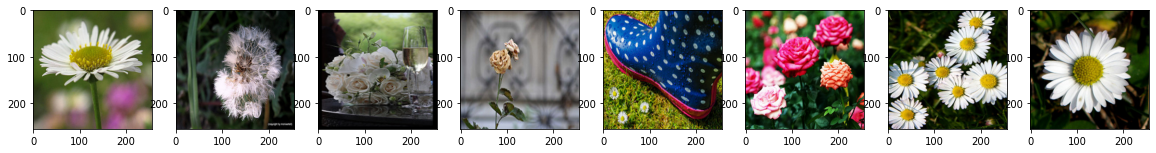

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(X_train[i])

## Homemade CNN model

First, let's build our own CNN.

❓ **Questions** ❓ 

- Build, compile and fit a CNN model adapted to the challenge.
- Compare the CNN performance with a baseline accuracy
- We recommand to use the following architecture:

---
```python
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

model = Sequential()

# Notice this cool new layer that "pipe" your rescaling within the architecture
model.add(Rescaling(1./255, input_shape=(256,256,3)))

# Lets add 3 convolution layers, with relatively large kernel size as our pictures are quite big too
model.add(layers.Conv2D(16, kernel_size=10, activation='relu'))
model.add(layers.MaxPooling2D(3))

model.add(layers.Conv2D(32, kernel_size=8, activation="relu"))
model.add(layers.MaxPooling2D(3))

model.add(layers.Conv2D(32, kernel_size=6, activation="relu"))
model.add(layers.MaxPooling2D(3))

model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
```
---

In [0]:
from tensorflow.keras import Sequential, layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

def load_own_model():

    model = Sequential()
    model.add(Rescaling(1./255, input_shape=(256,256,3)))

    model.add(layers.Conv2D(16, kernel_size=10, activation='relu'))
    model.add(layers.MaxPooling2D(3))
    
    model.add(layers.Conv2D(32, kernel_size=8, activation="relu"))
    model.add(layers.MaxPooling2D(3))

    model.add(layers.Conv2D(32, kernel_size=6, activation="relu"))
    model.add(layers.MaxPooling2D(3))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dense(3, activation='softmax'))
    
    opt = optimizers.Adam(learning_rate=1e-4)
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    
    return model

model_homemade = load_own_model()
model_homemade.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 247, 247, 16)      4816      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 82, 82, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 75, 75, 32)        32800     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 20, 20, 32)        36896     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 32)         

In [0]:
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, verbose=1, restore_best_weights=True)

history = model_homemade.fit(X_train, y_train,
         batch_size=16, 
         epochs=100, 
         validation_data=(X_val, y_val),
         callbacks=[es])

Epoch 1/100
36/36 [==============================] - 30s 815ms/step - loss: 1.0364 - accuracy: 0.4746 - val_loss: 0.9512 - val_accuracy: 0.5196
Epoch 2/100
36/36 [==============================] - 31s 874ms/step - loss: 0.8946 - accuracy: 0.5342 - val_loss: 0.8574 - val_accuracy: 0.5754
Epoch 3/100
36/36 [==============================] - 30s 826ms/step - loss: 0.8546 - accuracy: 0.5674 - val_loss: 0.8559 - val_accuracy: 0.5978
Epoch 4/100
36/36 [==============================] - 30s 827ms/step - loss: 0.8044 - accuracy: 0.6217 - val_loss: 0.8030 - val_accuracy: 0.6536
Epoch 5/100
36/36 [==============================] - 28s 782ms/step - loss: 0.7590 - accuracy: 0.6620 - val_loss: 0.8589 - val_accuracy: 0.5307
Epoch 6/100
36/36 [==============================] - 28s 769ms/step - loss: 0.7585 - accuracy: 0.6585 - val_loss: 0.8205 - val_accuracy: 0.6089
Epoch 7/100
36/36 [==============================] - 28s 767ms/step - loss: 0.7113 - accuracy: 0.6830 - val_loss: 0.9535 - val_accuracy:

In [0]:
res = model_homemade.evaluate(X_test, y_test)
res

5/5 [==============================] - 1s 156ms/step - loss: 0.7933 - accuracy: 0.6577


[0.7932626605033875, 0.6577181220054626]

In [0]:
test_accuracy = res[-1]
print(f"test_accuracy = {round(test_accuracy,2)*100} %")

test_accuracy = 66.0 %


## Transfer learning

### Load VGG16 model


❓ **Question** ❓ Write a first function `load_model()` that loads the pretrained VGG-16 model from `tensorflow.keras.applications.vgg16`. Have a look at the [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/applications/VGG16).

We will `load the VGG16 model` the following way:
- Let's use the `weights` learnt using the `"imagenet"` dataset
- The `input_shape` corresponds to the common input shape your images 
    - Note: *You have to resize them down to a common shape if they have different height/widths/channels*
- The `include_top` argument should be set to `False`: 
    - to avoid loading the weights of the fully-connected layers of the VGG16
    - and also remove the last layer of the VGG16 which was specifically trained on `imagenet`

❗ **Remark** ❗ Do not change the default value of the other arguments

In [0]:
from tensorflow.keras.applications.vgg16 import VGG16

def load_model():
    # $CHALLENGIFY_BEGIN
    model = VGG16(weights="imagenet", include_top=False, input_shape=X_train[0].shape)
    # $CHALLENGIFY_END
    
    return model
    

❓ **Question** ❓ Look at the architecture of the model thanks to the summary method

In [0]:
model = load_model()
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

<img src="https://neurohive.io/wp-content/uploads/2018/11/vgg16-1-e1542731207177.png">

Impressive, right? Two things to notice:
- It ends with a combo Conv2D/MaxPooling2D 
- The `layers.Flatten` and the `layers.Dense` are not here yet, we need to add them.
- There are more than 14.000.000 parameters, which is a lot... 
    - We could fine-tune them, i.e. update them as we will update the weights of the dense layers, but it will take a lot of time....
    - For this reason, we will inform the model that the layers until the flattening will be set non-trainable.

❓ **Question** ❓ Write a first function which:
- takes the previous model as the input
- sets the first layers to be non-trainable, by applying **`model.trainable = False`**
- return the model.

Then inspect the summary of the model to check that the parameters are no longer trainable, they were set to be  **`non-trainable`**.



In [0]:
def set_nontrainable_layers(model):
    # Set the first layers to be untrainable
    # YOUR CODE HERE
    
    return model

In [0]:
def set_nontrainable_layers(model):
    # Set the first layers to be untrainable
    model.trainable = False
    
    return model

model
model = set_nontrainable_layers(model)

model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

❓ **Question** ❓ We will write a function that adds flattening and dense layers after the first convolutional layers. To do so, cannot directly use the classic `layers.Sequential()` instantiation.

For that reason, we will see another one here. The idea is that we define each layer (or group of layers) separately. Then, we concatenate them. See this example : 

---
```python
base_model = load_model()
base_model = set_nontrainable_layers(base_model)
flattening_layer = layers.Flatten()
dense_layer = layers.Dense(SOME_NUMBER_1, activation='relu')
prediction_layer = layers.Dense(SOME_NUMBER_2, activation='APPROPRIATE_ACTIVATION')

model = tf.keras.Sequential([
  base_model,
  flattening_layer,
  dense_layer,
  prediction_layer
])

```
---
The first line loads a group of layer which is the previous VGG-16 model. Then, we set this layers to be non-tranable. Then, we can instantiate as many layers as we want.

Finally, we use the `Sequential` with the sequence of layers that will correspond to our overall neural network. 

Replicate the following steps by adding a flattening and two dense layers (the first with 500 neurons) to the previous VGG-16 model.

In [0]:
from tensorflow.keras import layers, models

def add_last_layers(model):
    '''Take a pre-trained model, set its parameters as non-trainables, and add additional trainable layers on top'''
    # $CHALLENGIFY_BEGIN
    base_model = set_nontrainable_layers(model)
    flatten_layer = layers.Flatten()
    dense_layer = layers.Dense(500, activation='relu')
    prediction_layer = layers.Dense(3, activation='softmax')
    
    
    model = models.Sequential([
        base_model,
        flatten_layer,
        dense_layer,
        prediction_layer
    ])
    # $CHALLENGIFY_END
    return model

❓ **Question** ❓ Now look at the layers and parameters of your model. Note that there is a distinction, at the end, between the trainable and non-trainable parameters

In [0]:
model = add_last_layers(model)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 8, 8, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 500)               16384500  
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 1503      
Total params: 31,100,691
Trainable params: 16,386,003
Non-trainable params: 14,714,688
_________________________________________________________________


❓ **Question** ❓ Write a function that build (and compile) your model - we advise Adam with `learning_rate=1e-4`. 

In [0]:
from tensorflow.keras import optimizers

def build_model():
    # $CHALLENGIFY_BEGIN    
    model = load_model()
    model = add_last_layers(model)
    
    opt = optimizers.Adam(learning_rate=1e-4)
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    return model
    # $CHALLENGIFY_END

In [0]:
model = build_model()

### Back to the data

The VGG16 model was trained on images which were preprocessed in a specific way. This is the reason why we did not normalized them earlier.

❓ **Question** ❓ Apply this processing to the original (non-normalized) images here using the method `preprocess_input` that you can import from `tensorflow.keras.applications.vgg16`. See [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/preprocess_input).

In [0]:
from tensorflow.keras.applications.vgg16 import preprocess_input

In [0]:
X_train = preprocess_input(X_train) 
X_val = preprocess_input(X_val)
X_test = preprocess_input(X_test)

### Fit the model

❓ **Question** ❓ Now estimate the model, with an early stopping criterion on the validation accuracy - here, the validation data are provided, therefore use `validation_data` instead of `validation_split`.

❗ **Remark** ❗ Store the results in a `history` variable

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, verbose=1, restore_best_weights=True)

history = model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val), 
                    epochs=50, 
                    batch_size=16, 
                    callbacks=[es])

Epoch 1/50
36/36 [==============================] - 114s 3s/step - loss: 3.8609 - accuracy: 0.7793 - val_loss: 1.3694 - val_accuracy: 0.8994
Epoch 2/50
36/36 [==============================] - 119s 3s/step - loss: 0.4966 - accuracy: 0.9755 - val_loss: 1.6035 - val_accuracy: 0.9218
Epoch 3/50
36/36 [==============================] - 110s 3s/step - loss: 0.0415 - accuracy: 0.9947 - val_loss: 1.6093 - val_accuracy: 0.8883
Epoch 4/50
36/36 [==============================] - 110s 3s/step - loss: 0.0017 - accuracy: 0.9982 - val_loss: 1.4452 - val_accuracy: 0.9050
Epoch 5/50
36/36 [==============================] - 109s 3s/step - loss: 4.0374e-06 - accuracy: 1.0000 - val_loss: 1.4757 - val_accuracy: 0.9106
Epoch 6/50
36/36 [==============================] - 110s 3s/step - loss: 1.3924e-06 - accuracy: 1.0000 - val_loss: 1.4774 - val_accuracy: 0.9106
Epoch 7/50
36/36 [==============================] - 113s 3s/step - loss: 1.0592e-06 - accuracy: 1.0000 - val_loss: 1.4772 - val_accuracy: 0.9106
R

❓ **Question** ❓ Plot the accuracy for the test and validation set using the usual function below

In [0]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    #ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    #ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

(<AxesSubplot:title={'center':'loss'}>,
 <AxesSubplot:title={'center':'Accuracy'}>)

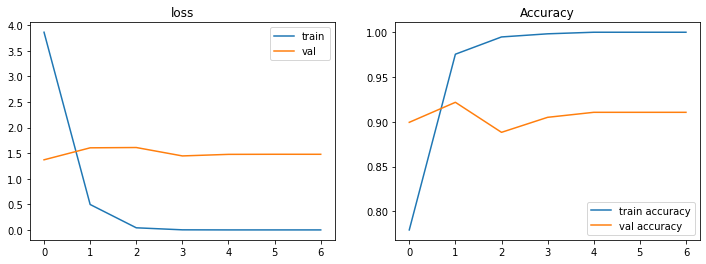

In [0]:
plot_history(history)

❓ **Question** ❓ Evaluate the model accuracy on the test set. Did we improve?

In [0]:
res_vgg = model.evaluate(X_test, y_test)

test_accuracy_vgg = res_vgg[-1]


print(f"test_accuracy_vgg = {round(test_accuracy_vgg,2)*100} %")

print(f"test_accuracy = {round(test_accuracy,2)*100} %")

print(f'Chance level: {1./num_classes*100:.1f}%')



5/5 [==============================] - 21s 4s/step - loss: 2.2746 - accuracy: 0.8926
test_accuracy_vgg = 89.0 %
test_accuracy = 66.0 %
Chance level: 33.3%


# (OPTIONAL). Improve the model

You can here try to improve the model test accuracy. To do that, here are some options you can consider

1. **Unfreeze and finetune**: Source: [Google tutorial](https://www.tensorflow.org/guide/keras/transfer_learning#fine-tuning) 
>_Once your model has converged on the new data, you can try to unfreeze all or part of the base model and retrain the whole model end-to-end with a very low learning rate. This is an optional last step that can potentially give you incremental improvements. It could also potentially lead to quick overfitting -- keep that in mind. It is critical to only do this step after the model with frozen layers has been trained to convergence. If you mix randomly-initialized trainable layers with trainable layers that hold pre-trained features, the randomly-initialized layers will cause very large gradient updates during training, which will destroy your pre-trained features. It's also critical to use a very low learning rate at this stage, because you are training a much larger model than in the first round of training, on a dataset that is typically very small. As a result, you are at risk of overfitting very quickly if you apply large weight updates. Here, you only want to readapt the pretrained weights in an incremental way._


1. Add **data augmentation** if your model is overfitting. 

1. If your model is not - unlikely here - , try a more complex model.

1. Perform precise **grid search** on all the hyper-parameters: learning_rate, batch_size, data augmentation etc...

1. **Change the base model** to more modern one (resnet, efficient net1. available in the keras library

1. Curate the data: maintaining a sane data set is one of the keys to success.

1. Obtain more data

## Data augmentation


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center=False,
    featurewise_std_normalization=False,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    brightness_range=(0.5, 1.),
    zoom_range=(0.3, 1.5))


# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(X_train)

model_data_aug = build_model()

train_flow = datagen.flow(X_train, y_train, batch_size=16)
val_flow = datagen.flow(X_val, y_val, batch_size=16)

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, verbose=1, restore_best_weights=True)

history_data_aug = model_data_aug.fit(train_flow,
                                      epochs=50,
                                      validation_data=val_flow, 
                                      callbacks=[es])

Epoch 1/50
36/36 [==============================] - 112s 3s/step - loss: 3.1393 - accuracy: 0.7320 - val_loss: 3.3147 - val_accuracy: 0.7598
Epoch 2/50
36/36 [==============================] - 114s 3s/step - loss: 2.0007 - accuracy: 0.8511 - val_loss: 1.6722 - val_accuracy: 0.8380
Epoch 3/50
36/36 [==============================] - 115s 3s/step - loss: 1.5069 - accuracy: 0.8774 - val_loss: 2.0098 - val_accuracy: 0.8492
Epoch 4/50
36/36 [==============================] - 117s 3s/step - loss: 1.8095 - accuracy: 0.8669 - val_loss: 2.1985 - val_accuracy: 0.8380
Epoch 5/50
36/36 [==============================] - 110s 3s/step - loss: 0.8364 - accuracy: 0.9089 - val_loss: 1.6827 - val_accuracy: 0.8268
Epoch 6/50
36/36 [==============================] - 110s 3s/step - loss: 0.8695 - accuracy: 0.8844 - val_loss: 0.7047 - val_accuracy: 0.8771
Epoch 7/50
36/36 [==============================] - 111s 3s/step - loss: 0.3297 - accuracy: 0.9352 - val_loss: 1.1395 - val_accuracy: 0.8771
Epoch 8/50
36

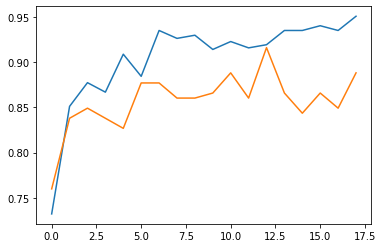

In [0]:
plt.plot(history_data_aug.history['accuracy'])
plt.plot(history_data_aug.history['val_accuracy'])
plt.show()

In [0]:
res_aug = model_data_aug.evaluate(X_test, y_test)

5/5 [==============================] - 20s 4s/step - loss: 0.9461 - accuracy: 0.8926


In [0]:
test_accuracy_aug = res_aug[-1]


print(f"test_accuracy_aug = {round(test_accuracy_aug,2)*100} %")

print(f"test_accuracy_vgg = {round(test_accuracy_vgg,2)*100} %")

print(f"test_accuracy = {round(test_accuracy,2)*100} %")

print(f'Chance level: {1./num_classes*100:.1f}%')



test_accuracy_aug = 89.0 %
test_accuracy_vgg = 89.0 %
test_accuracy = 66.0 %
Chance level: 33.3%


🏁 Congratulations 🏁 

1. Download this notebook from your `Google Drive` or directly from `Google Colab` 
2. Drag-and-drop it from your `Downloads` folder to your `local data-challenge repo`
3. Follow the usual procedure on your terminal in the `06-Deep-Learning/03-Convolutional-Neural-Networks/03-Cifar-Classification` folder:
      * *git add cifar_classification.ipynb*
      * *git commit -m "I am the god of CNNs"*
      * *git push origin master*

*Hint*: To find where this Colab notebook has been saved, click on `File` $\rightarrow$ `Locate in Drive`.